In [485]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# Volgens mij is het idee om alle benodigde datasets op te schonen en vervolgens een baseline te creeren. 
# Verder hebben we geidentificeerd dat er 14 Ids zijn die in alle datasets voorkomen. 
# We gaan dus 14 'test' personen creeren en voor ieder persoon een personalized feedback loop maken. 

# Functions

In [353]:
def remove_outliers(column):
    
    std = column.std()
    mean = column.mean()
    
    cleaned_df = column[column.between(mean - 3 * std, mean + 3 * std)]
    
    return cleaned_df

def empty(df):
    
    if df.isnull().sum().sum() == 0:
        return 'This dataframe does not have NULL values'
    else:
        return df.isnull().sum()

# Datasets

In [354]:
# blood pressure

# weight
weight = pd.read_csv('weightLogInfo_merged.csv')

# mood

# nourishment
daily_calories = pd.read_csv('dailyCalories_merged.csv')
hourly_calories = pd.read_csv('hourlyCalories_merged.csv')

# temperature

# heart rate
heart_rate = pd.read_csv('heartrate_seconds_merged.csv')
temp_df = pd.to_datetime(heart_rate['Time'])
heart_rate['New_date'] = temp_df.dt.date
heart_rate['New_time'] = temp_df.dt.time
heart_rate['New_time'] = heart_rate.New_time.astype(str).str.replace(':', "").astype(int)
heart_rate = heart_rate[(heart_rate.New_time > 70000) & (heart_rate.New_time < 220000)] # between 07:00 and 22:00

# steps
daily_activity = pd.read_csv('dailyActivity_merged.csv')
hourly_steps = pd.read_csv('hourlySteps_merged.csv') # weet nog niet of ik deze wil gebruiken

# sleep
sleep = pd.read_csv('sleepDay_merged.csv')

# Baseline values

## Blood pressure

## Weight

## Mood

## Nourishment

## Temperature

## Heart rate

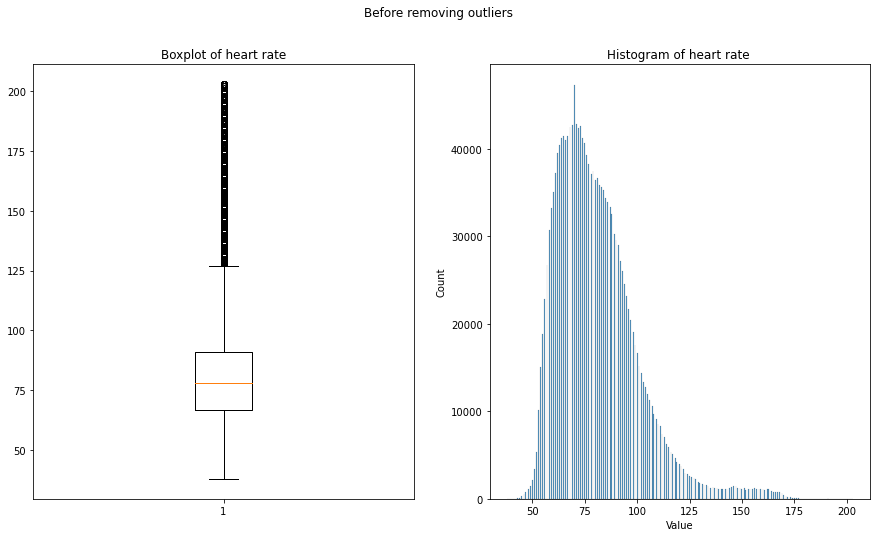

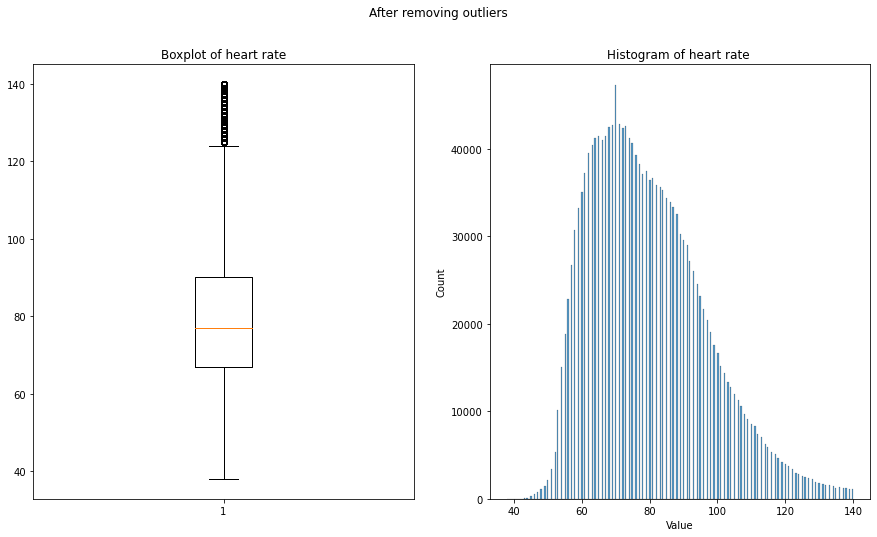

The average person with dementia has a heart rate of 80 between 07:00 - 22:00, with a min of 38 and a max of 140


In [486]:
# 1. remove outliers from data
# 2. what's the average of the with outliers removed

temp_heart_rate = heart_rate.copy()

# before removing outliers
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
fig.suptitle('Before removing outliers')

ax[0].boxplot(x = temp_heart_rate.Value)
ax[0].set_title('Boxplot of heart rate')

sns.histplot(data = temp_heart_rate.Value)
ax[1].set_title('Histogram of heart rate ')

plt.show()

# step 1
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
fig.suptitle('After removing outliers')

ax[0].boxplot(x = remove_outliers(temp_heart_rate.Value))
ax[0].set_title('Boxplot of heart rate')

sns.histplot(data = remove_outliers(temp_heart_rate.Value))
ax[1].set_title('Histogram of heart rate ')

plt.show()

# step 2
avg_heart_rate = round(remove_outliers(temp_heart_rate.Value).mean())
max_heart_rate = round(remove_outliers(temp_heart_rate.Value).max())
min_heart_rate = round(remove_outliers(temp_heart_rate.Value).min())
print('The average person with dementia has a heart rate of {} between 07:00 - 22:00, with a min of {} and a max of {}'
      .format(avg_heart_rate, min_heart_rate, max_heart_rate))


## Steps

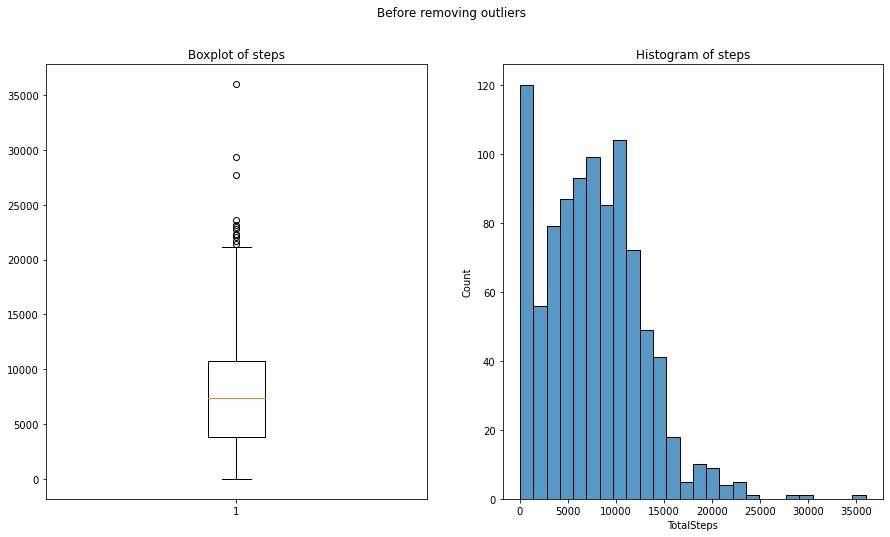

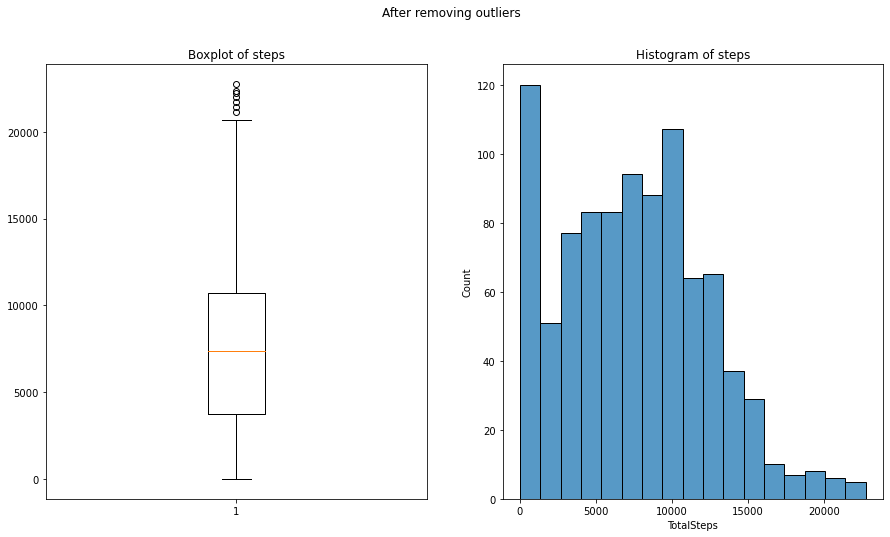

The average person with dementia takes 7436 steps a day.


In [487]:
# 1. remove outliers from data
# 2. how many steps does an individual Id take each day on average?
# 3. what's the average of step 2?

temp_daily_activity = daily_activity.copy()

# before removing outliers
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
fig.suptitle('Before removing outliers')

ax[0].boxplot(x = temp_daily_activity.TotalSteps)
ax[0].title.set_text('Boxplot of steps')

sns.histplot(ax = ax[1], data = temp_daily_activity.TotalSteps)
ax[1].title.set_text('Histogram of steps')

plt.show()

# step 1
fig, ax = plt.subplots(1, 2, figsize = (15, 8))
fig.suptitle('After removing outliers')

ax[0].boxplot(x = remove_outliers(temp_daily_activity.TotalSteps))
ax[0].title.set_text('Boxplot of steps')

sns.histplot(ax = ax[1], data = remove_outliers(temp_daily_activity.TotalSteps))
ax[1].title.set_text('Histogram of steps')

plt.show()

indices = remove_outliers(temp_daily_activity.TotalSteps).index
final_temp_daily_activity = temp_daily_activity.iloc[indices]

# step 2
steps_per_id = final_temp_daily_activity.groupby('Id').sum().TotalSteps
recorded_days = final_temp_daily_activity.Id.value_counts() # total number of recorded days per Id
recorded_days = recorded_days.reindex(steps_per_id.index)

# step 3
avg_steps_per_day = round((steps_per_id / recorded_days).mean())

print('The average person without dementia takes {} steps a day.'.format(avg_steps_per_day))

## Sleep

# Hier moet ik nog ff kijken of ik kan bepalen hoe laat ze gaan slapen en hoe laat ze wakker worden. Dan kan ik dat weer gebruiken om heart rate aan te passen.

In [495]:
kaas = sleep.groupby('Id').mean().TotalMinutesAsleep.mean() / 60; kaas

6.294125302344137

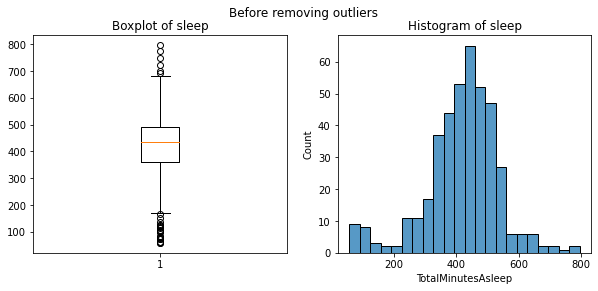

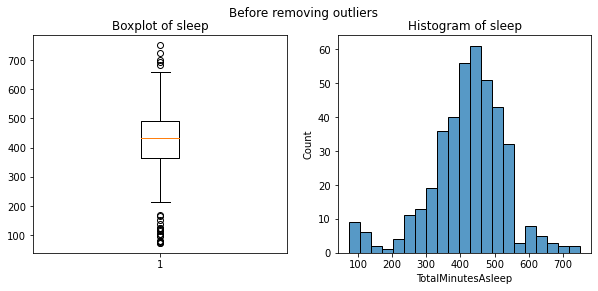

The average person without dementia sleeps 5.78 hours a night.


In [491]:
# 1. remove outliers from data
# 2. how many hours does an individual Id sleep on average?
# 3. what's the average of step 2?

# before removing outliers
temp_sleep = sleep.copy()

fig, ax = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('Before removing outliers')

ax[0].boxplot(x = temp_sleep.TotalMinutesAsleep)
ax[0].title.set_text('Boxplot of sleep')

sns.histplot(ax = ax[1], data = temp_sleep.TotalMinutesAsleep)
ax[1].title.set_text('Histogram of sleep')

plt.show()

# step 1
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('Before removing outliers')

ax[0].boxplot(x = remove_outliers(temp_sleep.TotalMinutesAsleep))
ax[0].title.set_text('Boxplot of sleep')

sns.histplot(ax = ax[1], data = remove_outliers(temp_sleep.TotalMinutesAsleep))
ax[1].title.set_text('Histogram of sleep')

plt.show()

# step 2
temp_sleep = sleep.groupby('Id').sum()
temp_sleep['sleepAverage'] = temp_sleep.TotalMinutesAsleep / temp_sleep.TotalSleepRecords

# step 3
avg_sleep_per_night = round(temp_sleep['sleepAverage'].mean() / 60, 2)

print('The average person without dementia sleeps {} hours a night.'.format(avg_sleep_per_night))

# Random shit die ik later misschien nog moet gebruiken

In [321]:
# csv_files = os.listdir()
# del csv_files[1]; del csv_files[2]; del csv_files[12]

# unique_indices = dict()

# for x in csv_files:
    
#     df = pd.read_csv(x)
#     unique_indices[x] = len(set(df.Id))
    
# df = pd.DataFrame(unique_indices.values(), index = unique_indices.keys()); df

In [322]:
# test = hourly_calories[hourly_calories['ActivityHour'].str.contains('4/16/2016')]
# test[test.Id == 1503960366].Calories.sum()